In [1]:
include("waveplate.jl")

    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union(Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}}, #D<:Distributions.Distribution{Distributions.Univariate, Distributions.Continuous}), Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:34.
To fix, define 
    insupport(_<:Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate, S<:Distributions.ValueSupport}, Distributions.Continuous}, Real)
before the new definition.
    insupport(Distributions.Truncated, Real) at /usr/share/julia/site/v0.4/Distributions/src/truncate.jl:33
is ambiguous with: 
    insupport(Union(Type{#D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}}, #D<:Distributions.Distribution{Distributions.Univariate, Distributions.Discrete}), Real) at /usr/share/julia/site/v0.4/Distributions/src/univariates.jl:35.
To fix,

plotSingleFile (generic function with 1 method)

In [2]:
names_589 = ["589/589_0", "589/589_2_-22", "589/589_2_-37", "589/589_2_-6.5",
             "589/589_2_8", "589/589_4_20", "589/589_4_-2.5", "589/589_4_42.5",
             "589/589_4_65", "589/589_4_86"];
infos_589 = Tuple[getFileInfo(name) for name in names_589]

10-element Array{Tuple,1}:
 ("589/589_0.txt",Any[589.0,0.0])          
 ("589/589_2_-22.txt",Any[589.0,2.0,-22.0])
 ("589/589_2_-37.txt",Any[589.0,2.0,-37.0])
 ("589/589_2_-6.5.txt",Any[589.0,2.0,-6.5])
 ("589/589_2_8.txt",Any[589.0,2.0,8.0])    
 ("589/589_4_20.txt",Any[589.0,4.0,20.0])  
 ("589/589_4_-2.5.txt",Any[589.0,4.0,-2.5])
 ("589/589_4_42.5.txt",Any[589.0,4.0,42.5])
 ("589/589_4_65.txt",Any[589.0,4.0,65.0])  
 ("589/589_4_86.txt",Any[589.0,4.0,86.0])  

In [3]:
model(x, p) = begin
    angl = x / 180 * 2π
    p[1] + p[2] * sin(angl) + p[3] * cos(angl)
end

function fitData(finfo, data)
    fit = curve_fit(model, data[:, 1], data[:, 2], 1 ./ data[:, 3].^2,
                    [mean(data[:, 2]), 0.0, 0.0])

    # We can estimate errors on the fit parameters,
    # to get 95% confidence error bars:
    errors = estimate_errors(fit, 0.95)
    (fit.param, errors)
end

fitData (generic function with 1 method)

In [4]:
function plotDataFit(finfo, data)
    param, errors = fitData(finfo, data)
    plotSingleData(finfo, data)
    xs = linspace(minimum(data[:, 1]) - 5, maximum(data[:, 1]) + 5, 1000)
    ys = model(xs, param)
    # ys1 = similar(ys)
    # ys2 = similar(ys)
    # for i in 1:length(xs)
    #     x = xs[i]
    #     angl = x / 180 * 2π
    #     s = abs(sin(angl))
    #     c = abs(cos(angl))
    #     e = errors[1] + errors[2] * s + errors[3] * c
    #     ys1[i] = ys[i] - e
    #     ys2[i] = ys[i] + e
    # end
    plot(xs, ys)
    # plot(xs, ys1)
    # plot(xs, ys2)
end

plotFileFit(finfo) = plotDataFit(finfo, getData(finfo))

plotFileFit (generic function with 1 method)

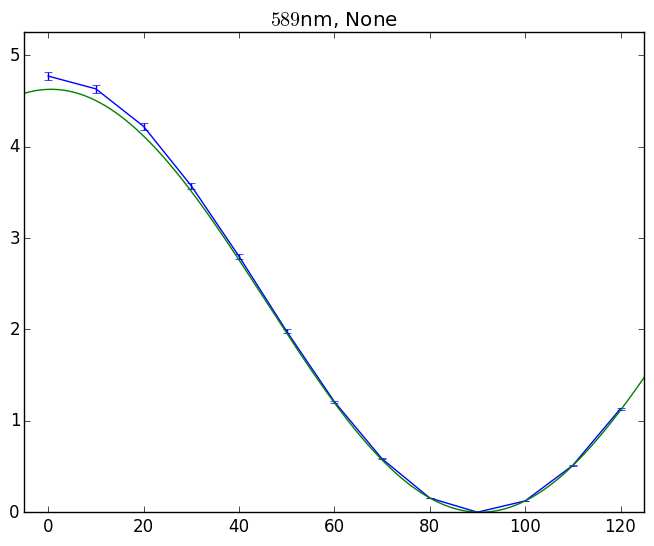

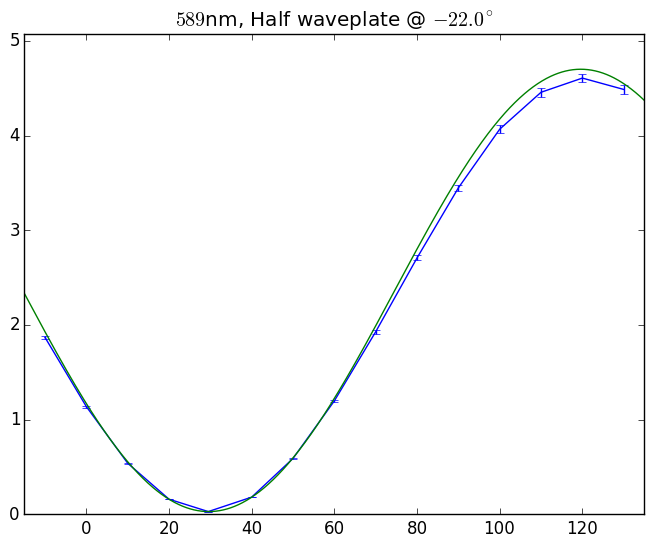

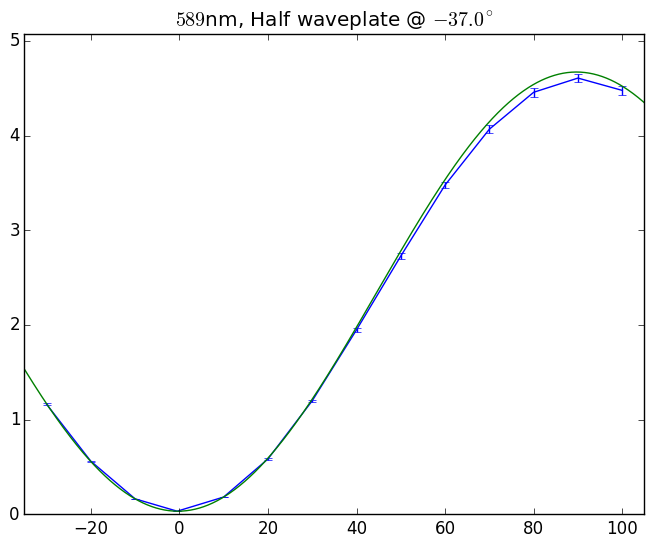

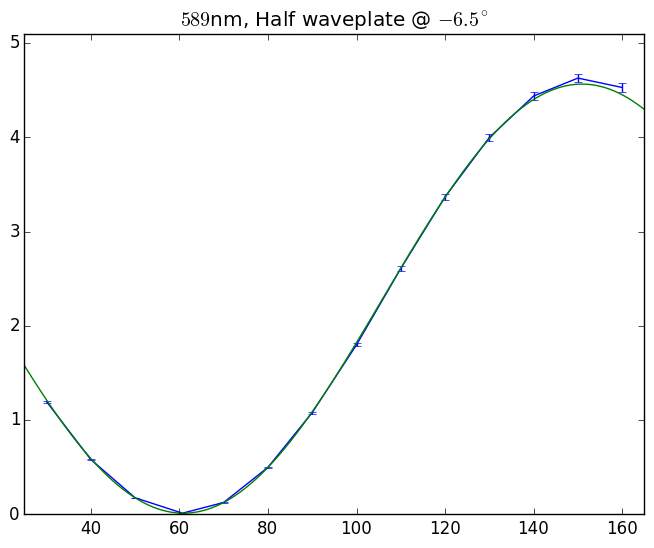

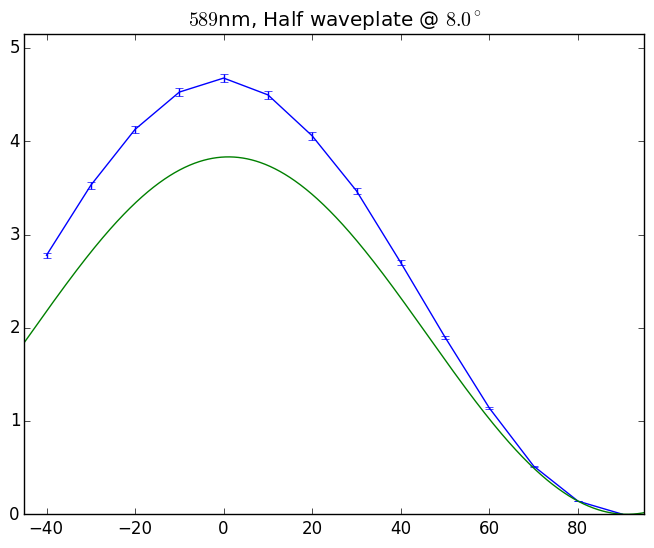

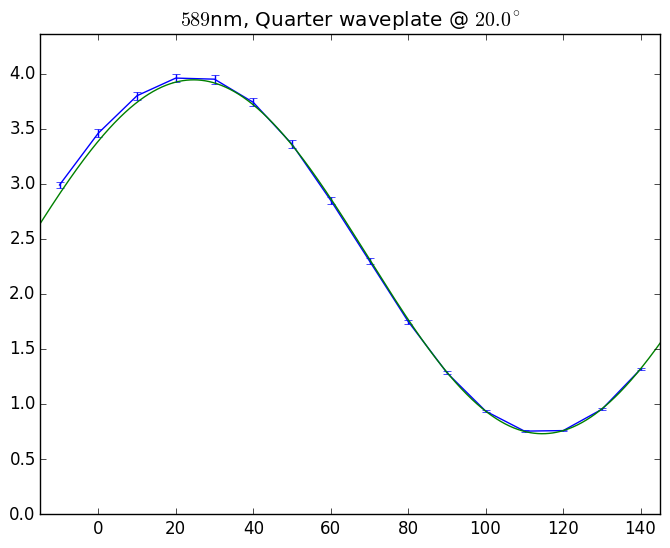

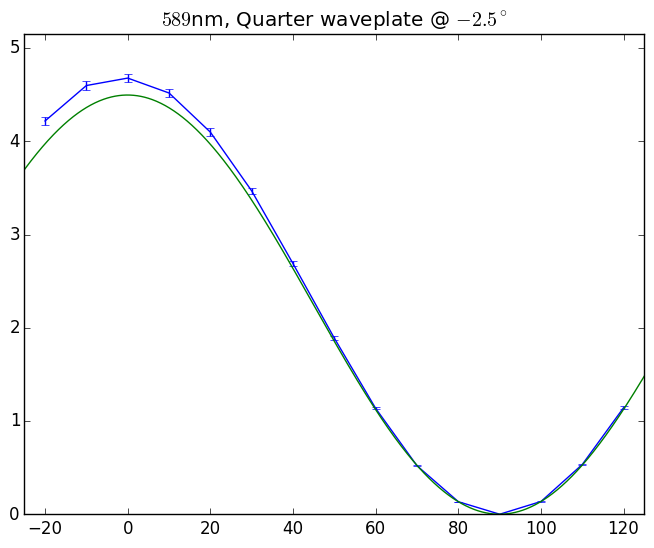

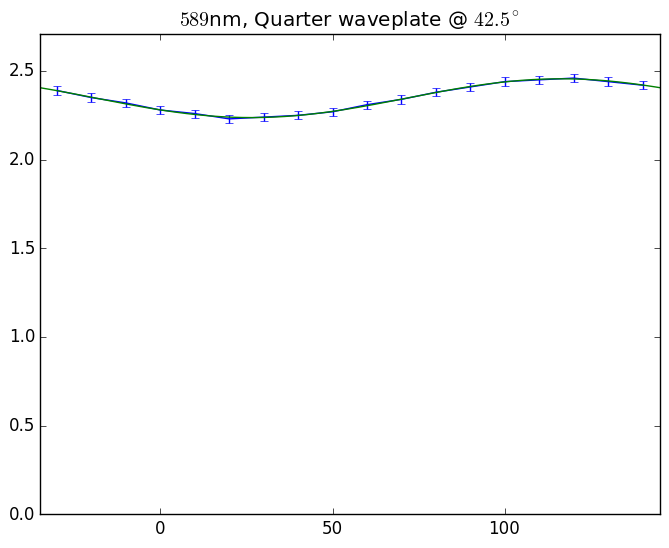

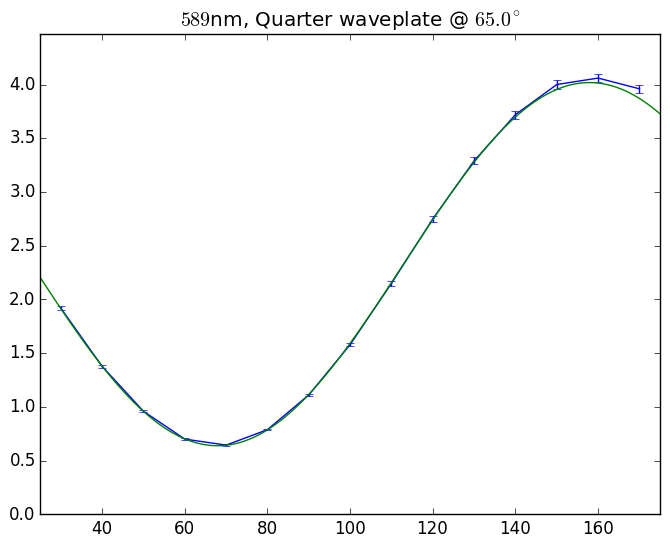

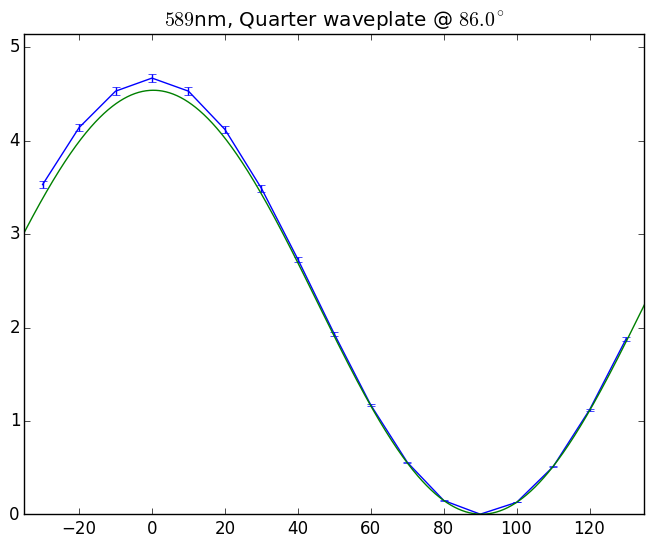

In [5]:
for finfo in infos_589
    plotFileFit(finfo)
end